In [ ]:
data_train_dir = "/content/insectos_corregido"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/insectos_corregido.zip"

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: insectos_corregido/8335452/d075s0348.jpg  
  inflating: insectos_corregido/8335452/d075s0349.jpg  
  inflating: insectos_corregido/8335452/d075s0350.jpg  
  inflating: insectos_corregido/8335452/d075s0351.jpg  
  inflating: insectos_corregido/8335452/d075s0352.jpg  
  inflating: insectos_corregido/8335452/d075s0364.jpg  
  inflating: insectos_corregido/8335452/d075s0365.jpg  
  inflating: insectos_corregido/8335452/d075s0366.jpg  
  inflating: insectos_corregido/8335452/d075s0367.jpg  
  inflating: insectos_corregido/8335452/d075s0368.jpg  
  inflating: insectos_corregido/8335452/d075s0369.jpg  
  inflating: insectos_corregido/8335452/d075s0370.jpg  
  inflating: insectos_corregido/8335452/d075s0383.jpg  
  inflating: insectos_corregido/8335452/d075s0384.jpg  
  inflating: insectos_corregido/8335452/d075s0385.jpg  
  inflating: insectos_corregido/8335452/d075s0386.jpg  
  inflating: insectos_corregido/8335452/d07

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from keras.layers import BatchNormalization as BN
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.metrics import TopKCategoricalAccuracy

In [ ]:
train_datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
target_size = (64, 32)
batch_size = 512
mode = 'categorical'
numclasses = 291

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode=mode,
    subset='training') # set as training data

Found 50776 images belonging to 291 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    data_train_dir, # same directory as training data
    target_size=target_size,
    batch_size=batch_size,
    class_mode=mode,
    subset='validation') # set as validation data

Found 12543 images belonging to 291 classes.


In [ ]:
## DEF NN TOPOLOGY  
model = Sequential()
model.add(Conv2D(32, (3, 3),input_shape=(*target_size, 3)))
model.add(BN())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BN())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BN())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(BN())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(BN())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(numclasses))
model.add(Activation('softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 30, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 62, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 60, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 14, 32)        0

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss')

In [ ]:
checkpoint_cb = ModelCheckpoint(filepath="/content/drive/MyDrive/Colab Notebooks/insectos_paper/insectos_paper_weight", save_best_only=True, save_weights_only=True, monitor='val_accuracy')

In [ ]:
## OPTIM AND COMPILE
opt = SGD(lr=0.1, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy', TopKCategoricalAccuracy(k=3, name="Top_3_accuracy")])

In [ ]:
## TRAINING with DA and LRA
history=model.fit(train_generator,
                            steps_per_epoch=len(train_generator.filenames) // batch_size, 
                            epochs=50,
                            validation_data=validation_generator,
                            callbacks=[reduce_lr,checkpoint_cb],
                            verbose=1)

Epoch 1/50
99/99 [==============================] - 265s 3s/step - loss: 5.5345 - accuracy: 0.0174 - Top_3_accuracy: 0.0458 - val_loss: 7.5674 - val_accuracy: 0.0085 - val_Top_3_accuracy: 0.0191
Epoch 2/50
99/99 [==============================] - 227s 2s/step - loss: 4.8644 - accuracy: 0.0512 - Top_3_accuracy: 0.1204 - val_loss: 5.4878 - val_accuracy: 0.0162 - val_Top_3_accuracy: 0.0462
Epoch 3/50
99/99 [==============================] - 221s 2s/step - loss: 4.4133 - accuracy: 0.0876 - Top_3_accuracy: 0.1836 - val_loss: 8.1678 - val_accuracy: 0.0082 - val_Top_3_accuracy: 0.0223
Epoch 4/50
99/99 [==============================] - 227s 2s/step - loss: 4.0572 - accuracy: 0.1272 - Top_3_accuracy: 0.2475 - val_loss: 19.2075 - val_accuracy: 0.0024 - val_Top_3_accuracy: 0.0162
Epoch 5/50
99/99 [==============================] - 228s 2s/step - loss: 3.5867 - accuracy: 0.1877 - Top_3_accuracy: 0.3463 - val_loss: 10.9417 - val_accuracy: 0.0122 - val_Top_3_accuracy: 0.0211
Epoch 6/50
99/99 [=====

In [ ]:
evaluating_model = model.evaluate_generator(validation_generator, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


25/25 [==============================] - 49s 2s/step - loss: 1.3424 - accuracy: 0.6195 - Top_3_accuracy: 0.8258


In [ ]:
import matplotlib.pyplot as plt

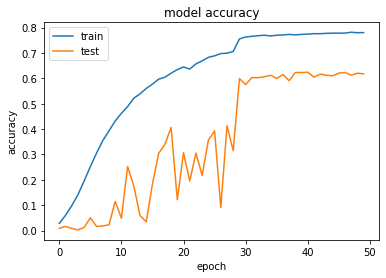

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()